In [1]:
import pandas as pd

subsets_path = "mondo_subsets.csv"
synonyms_path = "../../ontology/reports/all_synonym_data.tsv"
mondo_mappings_path = "../../ontology/mappings/mondo.sssom.tsv"

df_subsets = pd.read_csv(subsets_path, sep="\t")
df_synonyms = pd.read_csv(synonyms_path, sep="\t")
df_mappings = pd.read_csv(mondo_mappings_path, sep="\t", comment="#")

/var/folders/vj/ks1_0k8x3t9ftrwcr0t9vjwr0000gn/T/ipykernel_22440/3810523524.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_gard_nr.replace({'yes': True, 'no': False}, inplace=True)
/Users/matentzn/.pyenv/versions/3.11.7/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/matentzn/.pyenv/versions/3.11.7/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained a

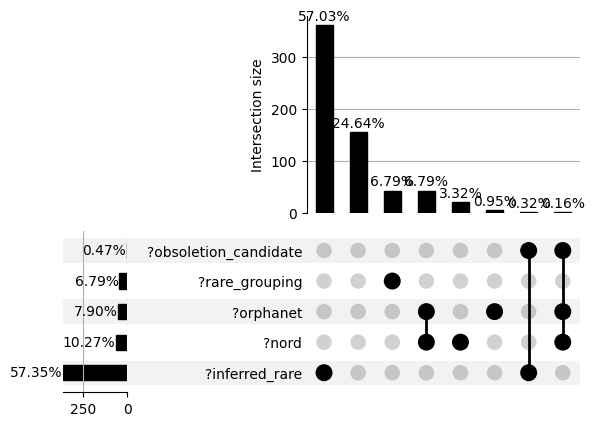

In [2]:
# GARD analysis
from upsetplot import from_memberships
from matplotlib import pyplot
from upsetplot import plot

#matplotlib.rcParams["font.size"] = 6

url_gard_not_rare = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTmFIVK1QUxd7NvOg1TjLMM8xGgNOWqCeLgZF6pFpIY79HU5FGNMxK7AZb5vjbxgA/pub?gid=900697982&single=true&output=tsv"

df_gard_nr = pd.read_csv(url_gard_not_rare, sep="\t")
df_gard_nr.replace({'yes': True, 'no': False}, inplace=True)
df_gard_nr.drop(columns=['?deprecated', '?label', '?gard', '?rare', '?general_grouping'], inplace=True)

count_df = df_gard_nr.drop(columns='?mondo_id').groupby(list(df_gard_nr.columns[1:])).size().reset_index(name='count')

memberships = []
counts = []
for _, row in count_df.iterrows():
    record = []
    for key in row.index:
        if key == 'count':
            counts.append(row[key])
        else:
            if row[key] == 1:
                record.append(key)
    memberships.append(record)

subset_data = from_memberships(
    data=counts,
    memberships=memberships,
)

subset_data.dropna(inplace=True)

plot(subset_data, sort_by="cardinality", show_percentages="{:.2%}")
pyplot.show()  

In [3]:
# Prepare subset data

rare_subsets = [
    #"rare",
    "nord_rare",
    "gard_rare",
    "mondo_rare",
    "nando_rare",
    "orphanet_rare",
    "inferred_rare"
]

providers_compare = [
    "nord",
    "gard",
    "nando",
    "orphanet",
    "clingen",
    "medgen",
    "omim",
    "doid"
]

df_rare = df_subsets[df_subsets["subset"].isin(["rare"])]

# Will be used throughout the notebook, dont change
rare = df_rare["id"].unique()
rare

array(['MONDO:0000005', 'MONDO:0000009', 'MONDO:0000014', ...,
       'MONDO:0018643', 'MONDO:0020530', 'MONDO:0035548'], dtype=object)

In [4]:
df_rare_subsets = df_subsets[df_subsets["subset"].isin(rare_subsets)]
df_rare_subsets["subset"] = df_rare_subsets["subset"].apply(lambda x: x.replace("_rare", " ").title())
df_subset_upset = df_rare_subsets[["id", "subset"]]
df_rare_subsets.head()

/var/folders/vj/ks1_0k8x3t9ftrwcr0t9vjwr0000gn/T/ipykernel_22440/3290211571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rare_subsets["subset"] = df_rare_subsets["subset"].apply(lambda x: x.replace("_rare", " ").title())


,id,subset,group
2,MONDO:0000005,Gard,diseases
4,MONDO:0000009,Gard,diseases
7,MONDO:0000014,Gard,diseases
10,MONDO:0000015,Gard,diseases
11,MONDO:0000015,Nord,diseases


In [5]:
df_synonyms["id"] = df_synonyms["?entity"].apply(lambda x: x.replace("<http://purl.obolibrary.org/obo/MONDO_", "MONDO:").replace(">", ""))
df_synonyms["synonym_type"] = df_synonyms["?synonym_property"].apply(lambda x: x.replace("<http://www.geneontology.org/formats/oboInOwl#", "").replace("<http://www.w3.org/2000/01/rdf-schema#","").replace(">", ""))
df_synonyms

,?entity,?synonym,?synonym_property,?xref,?st1,?st2,id,synonym_type
0,<http://purl.obolibrary.org/obo/MONDO_0042491>,cervix squamous intraepithelial lesion,<http://www.geneontology.org/formats/oboInOwl#...,NCIT:C7346,NaN,NaN,MONDO:0042491,hasExactSynonym
1,<http://purl.obolibrary.org/obo/MONDO_0003061>,benign muscle tumour,<http://www.geneontology.org/formats/oboInOwl#...,NaN,NaN,NaN,MONDO:0003061,hasExactSynonym
2,<http://purl.obolibrary.org/obo/MONDO_0013340>,young-onset Parkinson disease caused by mutati...,<http://www.geneontology.org/formats/oboInOwl#...,MONDO:design_pattern,NaN,NaN,MONDO:0013340,hasExactSynonym
3,<http://purl.obolibrary.org/obo/MONDO_0007972>,Mnire's vertigo,<http://www.geneontology.org/formats/oboInOwl#...,DOID:9849,NaN,NaN,MONDO:0007972,hasExactSynonym
4,<http://purl.obolibrary.org/obo/MONDO_0012081>,trisomy 15q11-q13,<http://www.geneontology.org/formats/oboInOwl#...,Orphanet:238446,NaN,NaN,MONDO:0012081,hasExactSynonym
...,...,...,...,...,...,...,...,...
169346,<http://purl.obolibrary.org/obo/MONDO_0002243>,hemorrhagic disease,<http://www.w3.org/2000/01/rdf-schema#label>,NaN,NaN,NaN,MONDO:0002243,label
169347,<http://purl.obolibrary.org/obo/MONDO_1010172>,"alpha-mannosidosis, non-human animal",<http://www.w3.org/2000/01/rdf-schema#label>,NaN,NaN,NaN,MONDO:1010172,label
169348,<http://purl.obolibrary.org/obo/MONDO_0100264>,peroxisome biogenesis disorder due to PEX10 de...,<http://www.w3.org/2000/01/rdf-schema#label>,NaN,NaN,NaN,MONDO:0100264,label
169349,<http://purl.obolibrary.org/obo/MONDO_0007118>,isolated anhidrosis with normal sweat glands,<http://www.w3.org/2000/01/rdf-schema#label>,NaN,NaN,NaN,MONDO:0007118,label


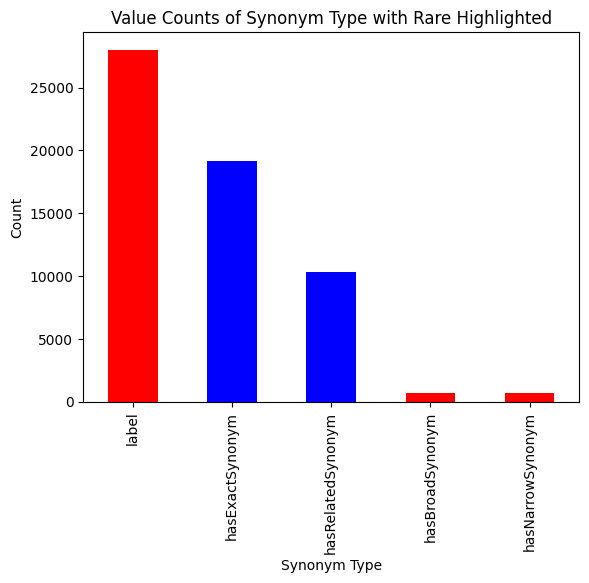

In [6]:
# Prepare synonyms data

from matplotlib import pyplot as plt


df_synonyms_unique = df_synonyms[["id", "synonym_type"]].drop_duplicates()
df_synonyms_unique['rare'] = df_synonyms_unique['id'].isin(rare)
df_synonyms_unique.head()

# make bar plot of the synonym types
# Map rare values to specific colors
color_map = {True: 'red', False: 'blue'}
bar_colors = df_synonyms_unique['rare'].map(color_map)

# Plot the bar plot with colored bars
ax = df_synonyms_unique['synonym_type'].value_counts().plot(kind='bar', color=bar_colors)

# Optional: Add labels and title
ax.set_xlabel('Synonym Type')
ax.set_ylabel('Count')
ax.set_title('Value Counts of Synonym Type with Rare Highlighted')

plt.show()


In [7]:
df_synonyms_unique.head()

,id,synonym_type,rare
0,MONDO:0042491,hasExactSynonym,True
1,MONDO:0003061,hasExactSynonym,False
2,MONDO:0013340,hasExactSynonym,False
3,MONDO:0007972,hasExactSynonym,True
4,MONDO:0012081,hasExactSynonym,True


In [8]:
def prepare_upset_membership_data(df_subset_upset):
    from upsetplot import from_memberships
    # Pivot the DataFrame to wide format
    wide_df = df_subset_upset.pivot_table(index='id', columns='subset', aggfunc=lambda x: 1, fill_value=0)

    # Reset the index to move 'ID' from the index to a column
    wide_df.reset_index(inplace=True)

    # Ensure that the column names are formatted correctly after pivoting
    wide_df.columns.name = None

    # Drop the 'ID' column and count the unique combinations of subsets
    count_df = wide_df.drop(columns='id').groupby(list(wide_df.columns[1:])).size().reset_index(name='count')

    memberships = []
    counts = []
    for _, row in count_df.iterrows():
        record = []
        for key in row.index:
            if key == 'count':
                counts.append(row[key])
            else:
                if row[key] == 1:
                    record.append(key)
        memberships.append(record)
    
    data = from_memberships(
        data=counts,
        memberships=memberships,
    )

    data.dropna(inplace=True)
    return data

/Users/matentzn/.pyenv/versions/3.11.7/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/matentzn/.pyenv/versions/3.11.7/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sty

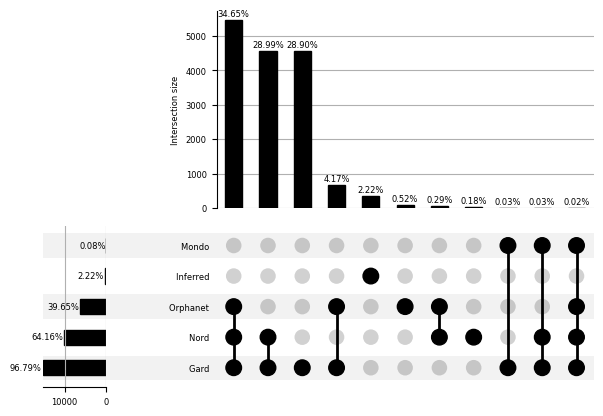

In [9]:
#!pip install upsetplot

from matplotlib import pyplot
import matplotlib
from upsetplot import plot

matplotlib.rcParams["font.size"] = 6

subset_data = prepare_upset_membership_data(df_subset_upset)
plot(subset_data, sort_by="cardinality", show_percentages="{:.2%}")
pyplot.show()  